In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import os

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving PT_001.jpg to PT_001.jpg
Saving PT_002.jpg to PT_002.jpg
Saving PT_003.jpg to PT_003.jpg
Saving PT_004.jpg to PT_004.jpg
Saving PT_005.jpg to PT_005.jpg
Saving PT_006.jpg to PT_006.jpg
Saving PT_007.jpg to PT_007.jpg
Saving PT_008.jpg to PT_008.jpg
Saving PT_009.jpg to PT_009.jpg
Saving PT_010.jpg to PT_010.jpg
Saving PT_011.jpg to PT_011.jpg
Saving PT_012.jpg to PT_012.jpg
Saving PT_013.jpg to PT_013.jpg
Saving PT_014.jpg to PT_014.jpg
Saving PT_015.jpg to PT_015.jpg
Saving PT_016.jpg to PT_016.jpg
Saving PT_017.jpg to PT_017.jpg
Saving PT_018.jpg to PT_018.jpg
Saving PT_019.jpg to PT_019.jpg
Saving PT_020.jpg to PT_020.jpg
Saving PT_021.jpg to PT_021.jpg
Saving PT_022.jpg to PT_022.jpg
Saving PT_023.jpg to PT_023.jpg
Saving PT_024.jpg to PT_024.jpg
Saving PT_025.jpg to PT_025.jpg
Saving PT_026.jpg to PT_026.jpg
Saving PT_027.jpg to PT_027.jpg
Saving PT_028.jpg to PT_028.jpg
Saving PT_029.jpg to PT_029.jpg
Saving PT_030.jpg to PT_030.jpg
Saving PT_031.jpg to PT_031.jpg
Saving P

In [6]:
rmdir /content/CarCrash/NP/.ipynb_checkpoints

In [7]:
os.chdir('/content/CarCrash')

In [8]:
data = []
target = []
new_size = (224,224)

# iteracion entre carpetas
for folder in os.listdir():
    os.chdir(folder)
    for file in os.listdir():
        # abre cada imagen y la escala
        img = PIL.Image.open(file)
        img_res = np.array(img.resize(new_size))
        
        # junta las imagenes y las etiqueta
        data.append(img_res)
        target.append(folder)
    os.chdir('..')

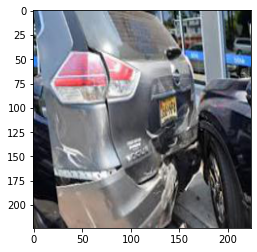

In [9]:
plt.imshow(data[1])

Importamos las librerias para el preprocesado y modelaje

In [10]:
import tensorflow as tf
from tensorflow import keras
import argparse
from imutils import paths
import cv2

In [11]:
from tensorflow.keras import backend as K
from tensorflow.keras import utils as np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import  ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [12]:
print(data)

[array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), array([[[ 80, 100, 124],
        [ 88, 111, 136],
        [ 73,  99, 128],
        ...,
        [  7,  11,   9],
        [  6,   9,  14],
        [  6,   9,  14]],

       [[ 75,  95, 119],
        

In [13]:
data[10].shape

(224, 224, 3)

In [18]:
print(data.shape)
print(target.shape)

(320, 224, 224, 3)
(320,)


In [19]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
target_n = lbl.fit_transform(target)

In [20]:
target_n[:3]

array([1, 1, 1])

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(data,target_n,test_size=0.25,stratify=target)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (240, 224, 224, 3)
x_test shape: (80, 224, 224, 3)
y_train shape: (240,)
y_test shape: (80,)


In [22]:
x_train_n = x_train / 255
x_test_n = x_test / 255
y_train_cat = to_categorical(y_train,num_classes=len(set(y_train)))
y_test_cat = to_categorical(y_test,num_classes=len(set(y_test)))

In [23]:
y_train_cat[:3]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

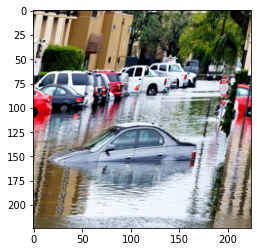

In [24]:
plt.imshow(x_train_n[1])

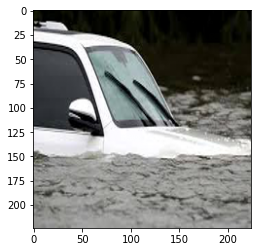

In [25]:
plt.imshow(x_train_n[10])

In [27]:
y_test_cat[:3]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [28]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers,optimizers
from tensorflow.keras.callbacks import TensorBoard,ModelCheckpoint,EarlyStopping


def model_create():
    model = Sequential()
    model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=x_train_n[0].shape,
                                 padding='same'))
    model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(3,3)))
    model.add(layers.Dropout(0.15))

    model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu', padding='same'))
    model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu', padding='same'))
    model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(3,3)))
    model.add(layers.Dropout(0.15))

    model.add(layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu', padding='same'))
    model.add(layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu', padding='same'))
    model.add(layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(3,3)))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(units=1024,activation='relu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(units=128,activation='relu'))
    model.add(layers.Dense(units=3,activation='softmax'))
    return model

model = model_create()

In [29]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 74, 74, 128)       147584    
                                                        

Preparamos el modelo el cual se probo con 20, 50 y 100 epochs

In [30]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=50,restore_best_weights=True)

history = model.fit(x_train_n, y_train_cat,epochs=10,validation_data=(x_test_n, y_test_cat), callbacks=[es])

Epoch 1/10
8/8 [==============================] - 189s 23s/step - loss: 3.8929 - accuracy: 0.3958 - val_loss: 1.1093 - val_accuracy: 0.2500
Epoch 2/10
8/8 [==============================] - 182s 23s/step - loss: 1.1502 - accuracy: 0.3625 - val_loss: 1.0961 - val_accuracy: 0.3750
Epoch 3/10
8/8 [==============================] - 179s 22s/step - loss: 1.1582 - accuracy: 0.3667 - val_loss: 1.0874 - val_accuracy: 0.3750
Epoch 4/10
8/8 [==============================] - 183s 23s/step - loss: 1.0759 - accuracy: 0.3958 - val_loss: 1.1592 - val_accuracy: 0.3750
Epoch 5/10
8/8 [==============================] - 178s 22s/step - loss: 1.3442 - accuracy: 0.3917 - val_loss: 1.0954 - val_accuracy: 0.3750
Epoch 6/10
8/8 [==============================] - 178s 22s/step - loss: 1.0877 - accuracy: 0.3750 - val_loss: 1.0909 - val_accuracy: 0.3750
Epoch 7/10
8/8 [==============================] - 182s 23s/step - loss: 1.0887 - accuracy: 0.4500 - val_loss: 1.0854 - val_accuracy: 0.3750
Epoch 8/10
8/8 [====

In [32]:
y_pred = model.predict(x_test_n).argmax(1)
y_true = y_test

In [33]:
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
set(lbl.inverse_transform(y_test))

{'NP', 'PP', 'PT'}

In [34]:
classes = ['NP', 'PP', 'PT']

Text(0.5, 15.0, 'Prediccion')

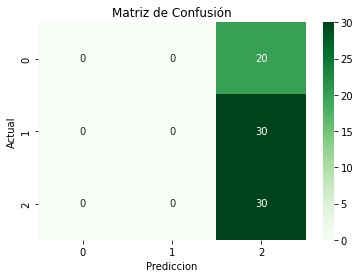

In [35]:
confusion_matrix(y_pred=y_pred,y_true=y_true)
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_pred=y_pred,y_true=y_true)), annot=True, cmap="Greens" ,fmt='g')
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Prediccion')

In [36]:
print('Model 1: \n',classification_report(y_true=y_true,y_pred=y_pred,target_names=classes))

Model 1: 
               precision    recall  f1-score   support

          NP       0.00      0.00      0.00        20
          PP       0.00      0.00      0.00        30
          PT       0.38      1.00      0.55        30

    accuracy                           0.38        80
   macro avg       0.12      0.33      0.18        80
weighted avg       0.14      0.38      0.20        80



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest', 
    validation_split = .25
)

valid_datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split = .25
)

data_dir = '/content/CarCrash'

train_data = train_datagen.flow_from_directory(data_dir, target_size = new_size, class_mode = 'categorical',
                                        subset = 'training')

val_data = valid_datagen.flow_from_directory(data_dir, target_size = new_size, class_mode = 'categorical',
                                        subset = 'validation')

Found 240 images belonging to 3 classes.
Found 80 images belonging to 3 classes.


In [38]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

vgg16 = VGG16(input_shape=x_train_n[0].shape, weights='imagenet',include_top=False)

for layer in vgg16.layers:
    layer.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [39]:
x1 = layers.Flatten()(vgg16.output)
x2 = layers.Dense(3,activation='softmax')(x1)

model2 = Model(inputs=vgg16.input,outputs=x2)

In [40]:
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
history = model2.fit_generator(
    generator=train_data,
    validation_data=val_data,
    epochs=100,
    callbacks=es
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/100
8/8 [==============================] - 172s 22s/step - loss: 4.5003 - accuracy: 0.3750 - val_loss: 2.0103 - val_accuracy: 0.3250
Epoch 2/100
8/8 [==============================] - 170s 22s/step - loss: 2.3821 - accuracy: 0.4250 - val_loss: 1.4154 - val_accuracy: 0.4625
Epoch 3/100
8/8 [==============================] - 172s 22s/step - loss: 1.4100 - accuracy: 0.5500 - val_loss: 1.2689 - val_accuracy: 0.5250
Epoch 4/100
8/8 [==============================] - 171s 22s/step - loss: 1.4671 - accuracy: 0.5500 - val_loss: 2.4810 - val_accuracy: 0.3375
Epoch 5/100
8/8 [==============================] - 171s 22s/step - loss: 1.7858 - accuracy: 0.5333 - val_loss: 3.5529 - val_accuracy: 0.3750
Epoch 6/100
8/8 [==============================] - 171s 22s/step - loss: 1.8643 - accuracy: 0.4875 - val_loss: 2.0105 - val_accuracy: 0.4750
Epoch 7/100
8/8 [==============================] - 171s 23s/step - loss: 1.4287 - accuracy: 0.5958 - val_loss: 1.1676 - val_accuracy: 0.5125
Epoch 8/100
8

In [42]:
y_pred = model.predict(x_test_n).argmax(1)
y_pred2 = model2.predict(x_test_n).argmax(1)
y_true = y_test

In [43]:
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
set(lbl.inverse_transform(y_test))

{'NP', 'PP', 'PT'}

In [44]:
classes = ['NP', 'PP', 'PT']

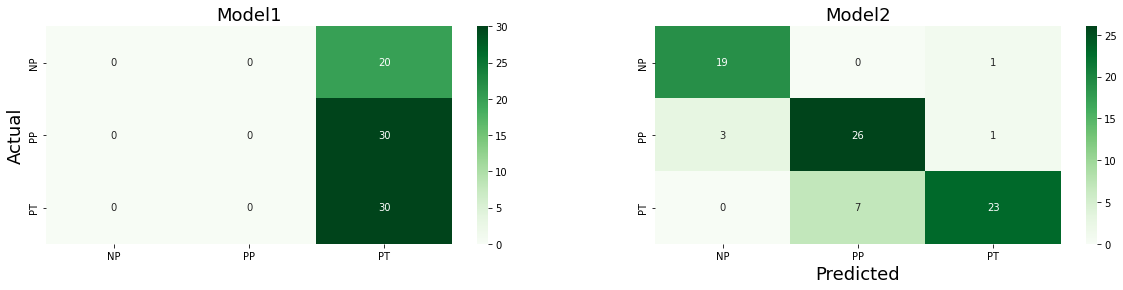

In [45]:
con_matrixes = [confusion_matrix(y_pred=y_pred,y_true=y_true),
                confusion_matrix(y_pred=y_pred2,y_true=y_true)]

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,4))
for i in range(2):
    sns.heatmap(con_matrixes[i],cmap='Greens',annot=True,fmt='g',ax=ax[i])
    ax[i].set_title('Model'+str(i+1),size=18)
    ax[i].set_xticklabels(classes)
    ax[i].set_yticklabels(classes)
ax[0].set_ylabel('Actual',size=18)
ax[1].set_xlabel('Predicted',size=18)
plt.show()

In [46]:
print('Model 2: \n',classification_report(y_true=y_true,y_pred=y_pred2,target_names=classes))

Model 2: 
               precision    recall  f1-score   support

          NP       0.86      0.95      0.90        20
          PP       0.79      0.87      0.83        30
          PT       0.92      0.77      0.84        30

    accuracy                           0.85        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.86      0.85      0.85        80

